# Module 11 Challenge
## Deliverable 2: Scrape and Analyze Mars Weather Data

In [1]:
# Import relevant libraries
from splinter import Browser
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
browser = Browser('chrome')

### Step 1: Visit the Website

Use automated browsing to visit the [Mars Temperature Data Site](https://static.bc-edx.com/data/web/mars_facts/temperature.html). Inspect the page to identify which elements to scrape.

   > **Hint** To identify which elements to scrape, you might want to inspect the page by using Chrome DevTools to discover whether the table contains usable classes.


In [6]:
# Visit the website
# https://static.bc-edx.com/data/web/mars_facts/temperature.html
url = "https://static.bc-edx.com/data/web/mars_facts/temperature.html"
browser.visit(url)

### Step 2: Scrape the Table

Create a Beautiful Soup object and use it to scrape the data in the HTML table.

Note that this can also be achieved by using the Pandas `read_html` function. However, use Beautiful Soup here to continue sharpening your web scraping skills.

In [9]:
# Create a Beautiful Soup Object
html = browser.html
soup = BeautifulSoup(html, 'html.parser')

In [11]:
# Extract all rows of data
table_data = soup.find('table', class_='table')
table_data

<table class="table">
<tbody><tr>
<th>id</th>
<th>terrestrial_date</th>
<th>sol</th>
<th>ls</th>
<th>month</th>
<th>min_temp</th>
<th>pressure</th>
</tr>
<tr class="data-row">
<td>2</td>
<td>2012-08-16</td>
<td>10</td>
<td>155</td>
<td>6</td>
<td>-75.0</td>
<td>739.0</td>
</tr>
<tr class="data-row">
<td>13</td>
<td>2012-08-17</td>
<td>11</td>
<td>156</td>
<td>6</td>
<td>-76.0</td>
<td>740.0</td>
</tr>
<tr class="data-row">
<td>24</td>
<td>2012-08-18</td>
<td>12</td>
<td>156</td>
<td>6</td>
<td>-76.0</td>
<td>741.0</td>
</tr>
<tr class="data-row">
<td>35</td>
<td>2012-08-19</td>
<td>13</td>
<td>157</td>
<td>6</td>
<td>-74.0</td>
<td>732.0</td>
</tr>
<tr class="data-row">
<td>46</td>
<td>2012-08-20</td>
<td>14</td>
<td>157</td>
<td>6</td>
<td>-74.0</td>
<td>740.0</td>
</tr>
<tr class="data-row">
<td>57</td>
<td>2012-08-21</td>
<td>15</td>
<td>158</td>
<td>6</td>
<td>-78.0</td>
<td>740.0</td>
</tr>
<tr class="data-row">
<td>68</td>
<td>2012-08-22</td>
<td>16</td>
<td>158</td>
<td>6</td>
<

### Step 3: Store the Data

Assemble the scraped data into a Pandas DataFrame. The columns should have the same headings as the table on the website. Here’s an explanation of the column headings:

* `id`: the identification number of a single transmission from the Curiosity rover
* `terrestrial_date`: the date on Earth
* `sol`: the number of elapsed sols (Martian days) since Curiosity landed on Mars
* `ls`: the solar longitude
* `month`: the Martian month
* `min_temp`: the minimum temperature, in Celsius, of a single Martian day (sol)
* `pressure`: The atmospheric pressure at Curiosity's location

In [14]:
# Create an empty list
table_list = []
rows = table_data.find_all('tr', class_='data-row')
# Loop through the scraped data to create a list of rows
for row in rows:
    row_list = [td.get_text() for td in row.find_all('td')]
    table_list.append(row_list)
table_list
    

[['2', '2012-08-16', '10', '155', '6', '-75.0', '739.0'],
 ['13', '2012-08-17', '11', '156', '6', '-76.0', '740.0'],
 ['24', '2012-08-18', '12', '156', '6', '-76.0', '741.0'],
 ['35', '2012-08-19', '13', '157', '6', '-74.0', '732.0'],
 ['46', '2012-08-20', '14', '157', '6', '-74.0', '740.0'],
 ['57', '2012-08-21', '15', '158', '6', '-78.0', '740.0'],
 ['68', '2012-08-22', '16', '158', '6', '-77.0', '740.0'],
 ['79', '2012-08-23', '17', '159', '6', '-76.0', '742.0'],
 ['112', '2012-08-27', '21', '161', '6', '-74.0', '741.0'],
 ['114', '2012-08-28', '22', '162', '6', '-74.0', '742.0'],
 ['123', '2012-08-29', '23', '162', '6', '-75.0', '741.0'],
 ['134', '2012-08-30', '24', '163', '6', '-75.0', '742.0'],
 ['145', '2012-08-31', '25', '163', '6', '-75.0', '743.0'],
 ['156', '2012-09-01', '26', '164', '6', '-76.0', '745.0'],
 ['163', '2012-09-02', '27', '164', '6', '-75.0', '743.0'],
 ['170', '2012-09-03', '28', '165', '6', '-75.0', '745.0'],
 ['171', '2012-09-04', '29', '166', '6', '-75.0',

In [16]:
# Create a Pandas DataFrame by using the list of rows and a list of the column names
columns = ["id", "terrestrial_date", "sol", "ls", "month", "min_temp", "pressure"]
df = pd.DataFrame(table_list, columns = columns)
df

,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
1,13,2012-08-17,11,156,6,-76.0,740.0
2,24,2012-08-18,12,156,6,-76.0,741.0
3,35,2012-08-19,13,157,6,-74.0,732.0
4,46,2012-08-20,14,157,6,-74.0,740.0
...,...,...,...,...,...,...,...
1862,1889,2018-02-23,1973,133,5,-78.0,730.0
1863,1892,2018-02-24,1974,134,5,-77.0,729.0
1864,1894,2018-02-25,1975,134,5,-76.0,729.0
1865,1893,2018-02-26,1976,135,5,-77.0,728.0


In [18]:
# Confirm DataFrame was created successfully
df.head()

,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
1,13,2012-08-17,11,156,6,-76.0,740.0
2,24,2012-08-18,12,156,6,-76.0,741.0
3,35,2012-08-19,13,157,6,-74.0,732.0
4,46,2012-08-20,14,157,6,-74.0,740.0


### Step 4: Prepare Data for Analysis

Examine the data types that are currently associated with each column. If necessary, cast (or convert) the data to the appropriate `datetime`, `int`, or `float` data types.

  > **Hint** You can use the Pandas `astype` and `to_datetime` methods to accomplish this task.


In [21]:
# Examine data type of each column
df.dtypes

id                  object
terrestrial_date    object
sol                 object
ls                  object
month               object
min_temp            object
pressure            object
dtype: object

In [23]:
# Change data types for data analysis
df['terrestrial_date'] = pd.to_datetime(df['terrestrial_date'])

In [25]:
df[["sol", "ls", "month"]] = df[["sol", "ls", "month"]].astype(int)
df.dtypes

id                          object
terrestrial_date    datetime64[ns]
sol                          int32
ls                           int32
month                        int32
min_temp                    object
pressure                    object
dtype: object

In [27]:
df[["min_temp", "pressure"]] = df[["min_temp", "pressure"]].astype(float)
df.dtypes

id                          object
terrestrial_date    datetime64[ns]
sol                          int32
ls                           int32
month                        int32
min_temp                   float64
pressure                   float64
dtype: object

In [29]:
# Confirm type changes were successful by examining data types again
df.dtypes

id                          object
terrestrial_date    datetime64[ns]
sol                          int32
ls                           int32
month                        int32
min_temp                   float64
pressure                   float64
dtype: object

### Step 5: Analyze the Data

Analyze your dataset by using Pandas functions to answer the following questions:

1. How many months exist on Mars?
2. How many Martian (and not Earth) days worth of data exist in the scraped dataset?
3. What are the coldest and the warmest months on Mars (at the location of Curiosity)? To answer this question:
    * Find the average the minimum daily temperature for all of the months.
    * Plot the results as a bar chart.
4. Which months have the lowest and the highest atmospheric pressure on Mars? To answer this question:
    * Find the average the daily atmospheric pressure of all the months.
    * Plot the results as a bar chart.
5. About how many terrestrial (Earth) days exist in a Martian year? To answer this question:
    * Consider how many days elapse on Earth in the time that Mars circles the Sun once.
    * Visually estimate the result by plotting the daily minimum temperature.


In [52]:
# 1. How many months are there on Mars?
months = df['month'].nunique()
months

12

In [54]:
# 2. How many sols (Martian days) worth of data are there?
sols = len(df)
sols

1867

In [36]:
# 3. What is the average minimum temperature by month?
avg_min_temp_month = df.groupby(['month'])['min_temp'].mean()
avg_min_temp_month

month
1    -77.160920
2    -79.932584
3    -83.307292
4    -82.747423
5    -79.308725
6    -75.299320
7    -72.281690
8    -68.382979
9    -69.171642
10   -71.982143
11   -71.985507
12   -74.451807
Name: min_temp, dtype: float64

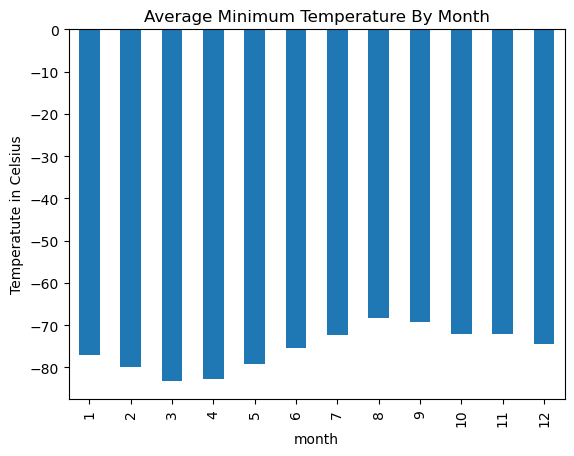

In [38]:
# Plot the average minimum temperature by month
df.groupby(['month'])['min_temp'].mean()
avg_min_temp_month.plot(kind='bar')
plt.title('Average Minimum Temperature By Month')
plt.xlabel('month')
plt.ylabel('Temperatute in Celsius')
plt.show()

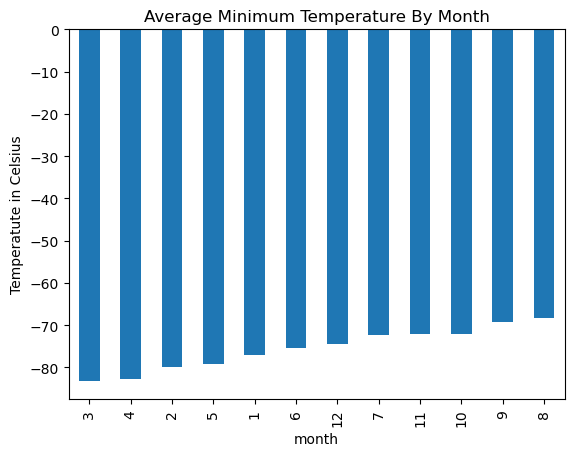

In [40]:
# Identify the coldest and hottest months in Curiosity's location by sorting the previous graph
avg_min_temp_month.sort_values(ascending=True).plot(kind='bar')
plt.title('Average Minimum Temperature By Month')
plt.xlabel('month')
plt.ylabel('Temperatute in Celsius')
plt.show()

In [42]:
# 4. What is the average pressure by month?
pressure = df.groupby(['month']) ['pressure'].mean()
pressure

month
1     862.488506
2     889.455056
3     877.322917
4     806.329897
5     748.557047
6     745.054422
7     795.105634
8     873.829787
9     913.305970
10    887.312500
11    857.014493
12    842.156627
Name: pressure, dtype: float64

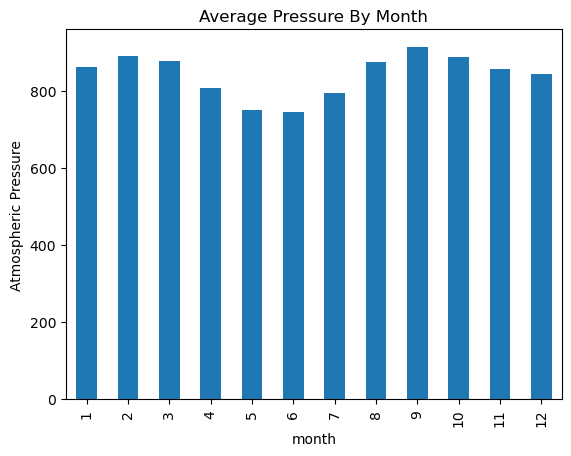

In [44]:
# Plot the average pressure by month
pressure.plot(kind='bar')
plt.title('Average Pressure By Month')
plt.xlabel('month')
plt.ylabel('Atmospheric Pressure')
plt.show()

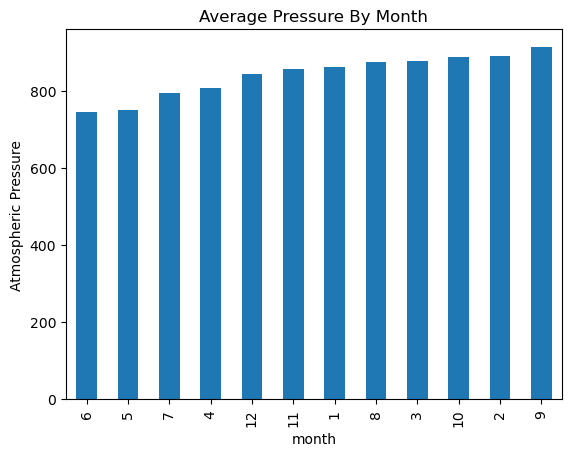

In [46]:
# Identify the lowest and highest pressure months in Curiosity's location by sorting the previous graph
pressure.sort_values(ascending=True).plot(kind='bar')
plt.title('Average Pressure By Month')
plt.xlabel('month')
plt.ylabel('Atmospheric Pressure')
plt.show()


In [102]:
df['ls'].min()

0

In [104]:
df['ls'].max()

359

In [84]:
df_ls_0 = df[df['ls'] == 0]
df_ls_0.set_index('terrestrial_date', inplace=True)

In [120]:
df_ls_0.sort_index(inplace=True)
df_ls_0

,id,sol,ls,month,min_temp,pressure
terrestrial_date,,,,,,
2013-08-01,320,351,0,1,-75.0,853.0
2013-08-02,319,352,0,1,-77.0,854.0
2015-06-19,954,1019,0,1,-81.0,849.0
2015-06-20,938,1020,0,1,-63.0,832.0
2017-05-06,1606,1688,0,1,-76.0,840.0
2017-05-07,1610,1689,0,1,-75.0,840.0


In [124]:
earth_start_date = df_ls_0.index.min()
earth_start_date

Timestamp('2013-08-01 00:00:00')

In [134]:
df_ls_0.index == earth_start_date

array([ True, False, False, False, False, False])

In [140]:
mars_start_sol = df_ls_0[df_ls_0.index == earth_start_date]['sol'].values[0]
mars_start_sol

351

In [110]:
df_ls_359 = df[df['ls'] == 359]
df_ls_359.set_index('terrestrial_date', inplace=True)
df_ls_359.sort_index(inplace=True)
df_ls_359

,id,sol,ls,month,min_temp,pressure
terrestrial_date,,,,,,
2013-07-30,316,349,359,12,-75.0,852.0
2013-07-31,318,350,359,12,-76.0,853.0
2015-06-17,955,1017,359,12,-78.0,850.0
2015-06-18,956,1018,359,12,-79.0,850.0
2017-05-04,1607,1686,359,12,-75.0,838.0
2017-05-05,1608,1687,359,12,-75.0,838.0


In [142]:
earth_last_date = df_ls_359.index.max()
earth_last_date

Timestamp('2017-05-05 00:00:00')

In [144]:
mars_last_sol = df_ls_359[df_ls_359.index == earth_last_date]['sol'].values[0]
mars_last_sol

1687

In [148]:
# Calculate the difference in Earth days
earth_days_diff = (earth_last_date - earth_start_date).days
earth_days_diff

1373

In [152]:
# Calculate the difference in sols (Martian days)
sol_diff = mars_last_sol - mars_start_sol
sol_diff

1336

In [154]:
earth_days_per_sol = earth_days_diff / sol_diff
earth_days_per_sol

1.027694610778443

In [160]:
estimated_martian_year_in_earth_days = earth_days_per_sol * 687
estimated_martian_year_in_earth_days

706.0261976047904

In [162]:
# Output results
print(f"First Date: {earth_start_date}")
print(f"Last Date: {earth_last_date}")
print(f"Earth Days Difference: {earth_days_diff} days")
print(f"Sol Difference: {sol_diff} sols")
print(f"Estimated Martian Year Length in Earth Days: {estimated_martian_year_in_earth_days:.2f} Earth days")

First Date: 2013-08-01 00:00:00
Last Date: 2017-05-05 00:00:00
Earth Days Difference: 1373 days
Sol Difference: 1336 sols
Estimated Martian Year Length in Earth Days: 706.03 Earth days


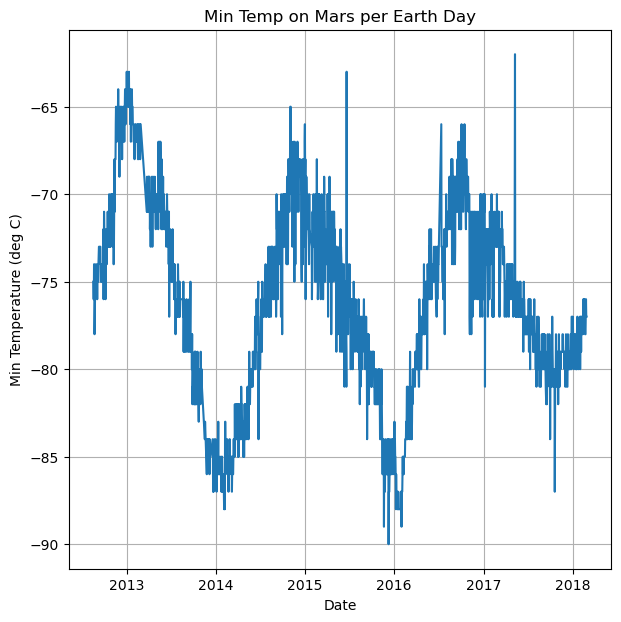

In [168]:
fig, ax = plt.subplots(figsize=[7,7])
ax = plt.plot(df.terrestrial_date,df.min_temp)
plt.grid(visible=True, which='both')
plt.xlabel('Date')
plt.ylabel('Min Temperature (deg C)')
plt.title('Min Temp on Mars per Earth Day')
plt.show()

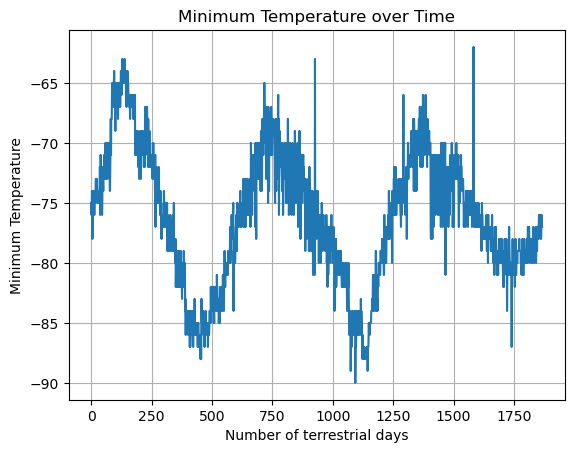

In [188]:
# Visually estimate the result by plotting the daily minimum temperature of each observation in the data set.

df['min_temp'].plot()
plt.title('Minimum Temperature over Time')
plt.xlabel('Number of terrestrial days')
plt.ylabel('Minimum Temperature')
plt.grid(visible=True, which='both')
plt.show()

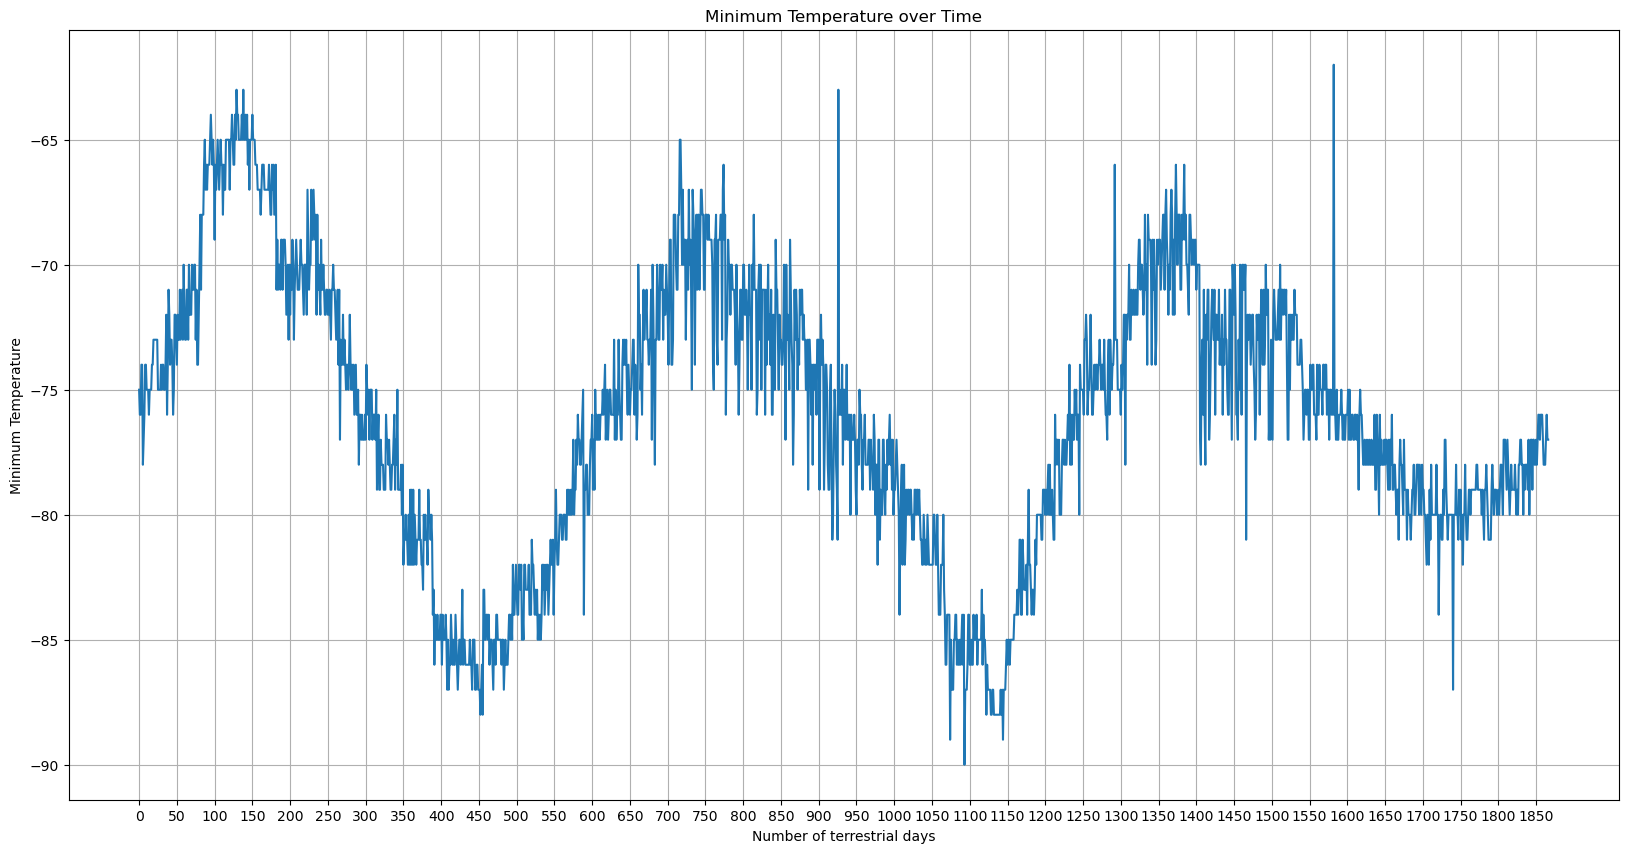

In [186]:
import numpy as np
# Visually estimate the result by plotting the daily minimum temperature of each observation in the data set.
plt.figure(figsize=(20,10))
df['min_temp'].plot()

plt.title('Minimum Temperature over Time')
plt.xlabel('Number of terrestrial days')
plt.ylabel('Minimum Temperature')
plt.xticks(np.arange(0, 1900, 50))
plt.grid(visible=True, which='both')
plt.show()

#### Minimum Temperature

The coldest temperature, which is below -80C (specifically -83C), occurs in the third month. 
On the other hand, the warmest temperature is approximately -68C, recorded in the eighth month

#### Atmospheric Pressure

The atmospheric pressure is lowest in the sixth month and highest in the ninth month.

#### Year Length

From the plot, the distance between two peaks is approximately 600 terrestrial days, with the peaks corresponding to days 125 and 725 on the x-axis.

### Step 6: Save the Data

Export the DataFrame to a CSV file.

In [190]:
# Write the data to a CSV
df.to_csv("output/mars_weather.csv")

In [192]:
browser.quit()